In [1]:
#Mengimpor library pandas
import pandas as pd
pd.set_option('display.max_column', 20)

In [2]:
#Membaca file
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

#Menampilkan isi data
print(dataset_retail)

           no  Row_Num  Customer_ID Product  First_Transaction  \
0           1        1        29531   Jaket      1466304274396   
1           2        2        29531  Sepatu      1406077331494   
2           3        3       141526     Tas      1493349147000   
3           4        4       141526   Jaket      1493362372547   
4           5        5        37545  Sepatu      1429178498531   
...       ...      ...          ...     ...                ...   
99995   99996    99996        56249   Jaket      1464780939092   
99996   99997    99997        56249  Sepatu      1486619170763   
99997   99998    99998        34157   Jaket      1440924860706   
99998   99999    99999        34157  Sepatu      1415932948026   
99999  100000   100000       188822   Jaket      1540373764125   

       Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0         1538718482608                     1467681                 22  
1         1545735761270                     1269337          

In [3]:
#Melihat detail tipe data
dataset_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
#Mengimpor library datetime
import datetime

#Mengubah kolom first_Transaction dan Last_Transaction ke bentuk Datetime
dataset_retail['First_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date

dataset_retail.sort_values('First_Transaction', inplace=True)

dataset_retail

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
29588,29589,29589,666,Sepatu,2013-03-08,2013-03-08,8892083,1
46452,46453,46453,680,Sepatu,2013-03-11,2013-03-11,3142403,1
68535,68536,68536,699,Sepatu,2013-03-14,2013-03-14,1995735,1
9205,9206,9206,780,Sepatu,2013-03-26,2017-09-10,645436,90
56435,56436,56436,796,Sepatu,2013-03-27,2013-03-27,2002187,1
...,...,...,...,...,...,...,...,...
77044,77045,77045,760138,Tas,2019-02-01,2019-02-01,922413,2
96598,96599,96599,55740,Jaket,2019-02-01,2019-02-01,545046,1
89817,89818,89818,845793,Sepatu,2019-02-01,2019-02-01,709844,1
82040,82041,82041,845987,Jaket,2019-02-01,2019-02-01,1952744,5


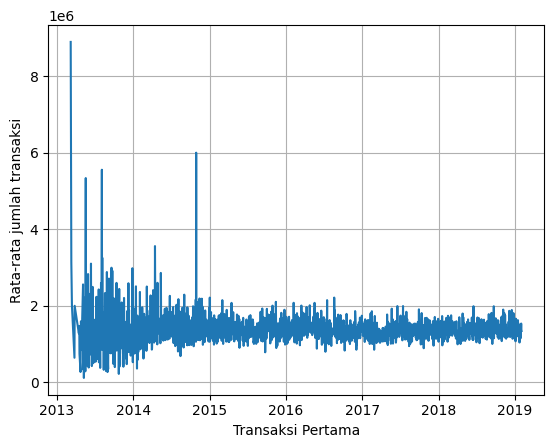

In [5]:
#Kita akan buat agregasi rata-rata jumlah transaksi harian berdasarkan kolom First_Transaction
daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

#Mengimport library matplotlib
import matplotlib.pyplot as plt

#Menampilkan nilai rata-rata jumlah transaksi dalam bentuk grafik
plt.plot(daily_avg_trx['First_Transaction'], daily_avg_trx['Average_Transaction_Amount'])
plt.xlabel('Transaksi Pertama')
plt.ylabel('Rata-rata jumlah transaksi')
plt.grid()
plt.show()

In [6]:
#Mengimport library adfuller
from statsmodels.tsa.stattools import adfuller

#Mengecek stationary data
df_stationarityTest = adfuller(daily_avg_trx['Average_Transaction_Amount'])
print("p-value: ", df_stationarityTest[1])

p-value:  0.0


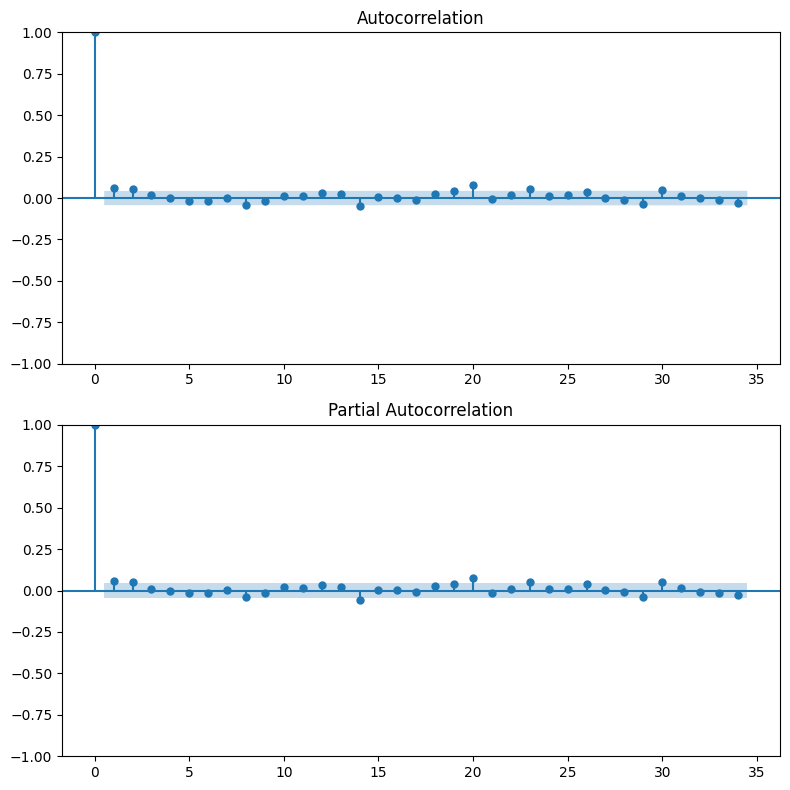

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(8,8))

#Menampilkan Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[0])

#Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[1])

plt.tight_layout()
plt.show()

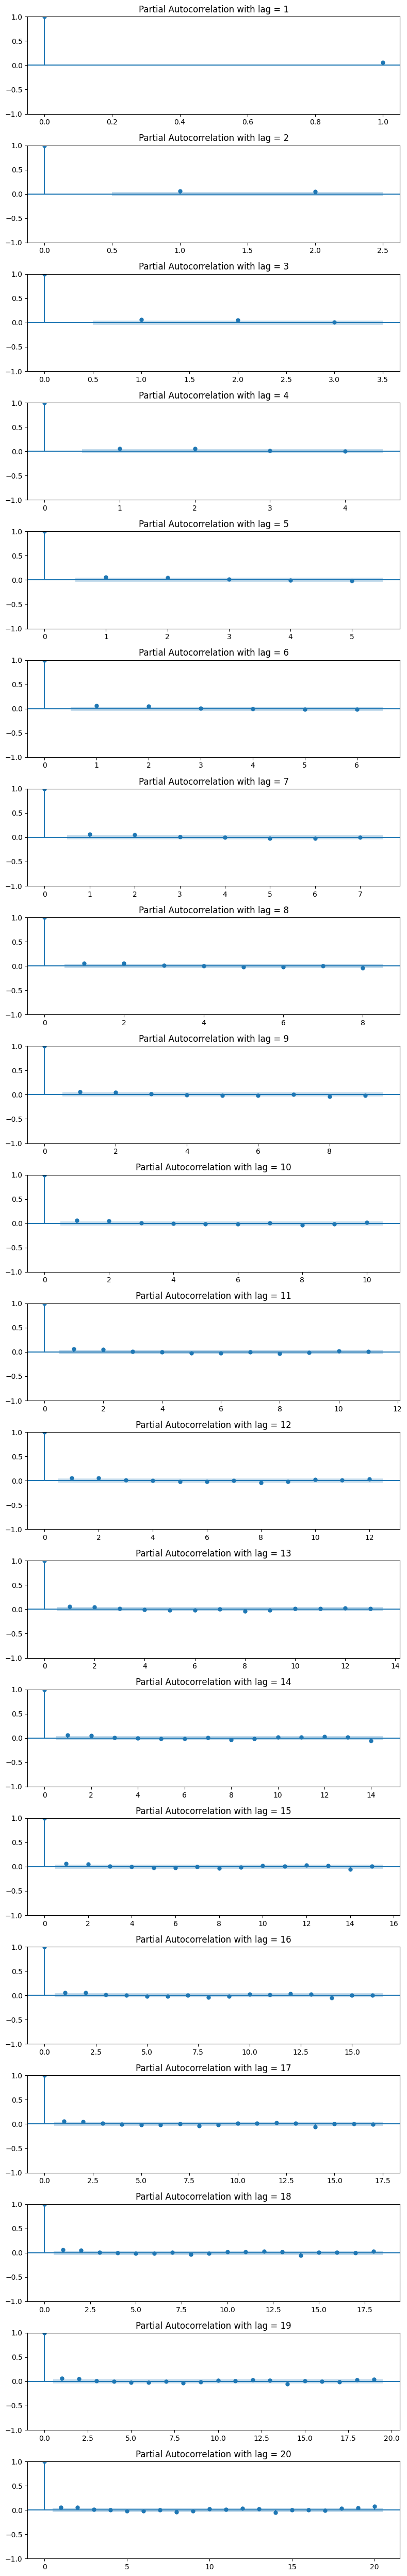

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(20, 1, figsize=(8,50))

#Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf

#Plot dengan lags 1 hingga 20
for i, ax in enumerate(axs):
	plot_pacf(daily_avg_trx['Average_Transaction_Amount'], lags=i+1, ax=ax)
	ax.set_title('Partial Autocorrelation with lag = %d' % (i+1,))

plt.tight_layout()
plt.show()

In [9]:
#Pembagian dataset atas training dan testing
train_data = daily_avg_trx['Average_Transaction_Amount'][:len(daily_avg_trx)-10]
test_data = daily_avg_trx['Average_Transaction_Amount'][len(daily_avg_trx)-10:]

print('Ukuran data training:', train_data.shape)
print('Ukuran data testing :', test_data.shape)

#Model auto regression
from statsmodels.tsa.ar_model import AutoReg

#Fit data ke dalam mode
ar_model = AutoReg(train_data, lags=10).fit()
print(ar_model.summary())

Ukuran data training: (2092,)
Ukuran data testing : (10,)
                                AutoReg Model Results                                 
Dep. Variable:     Average_Transaction_Amount   No. Observations:                 2092
Model:                            AutoReg(10)   Log Likelihood              -29552.004
Method:                       Conditional MLE   S.D. of innovations         353312.353
Date:                        Sat, 06 Apr 2024   AIC                          59128.009
Time:                                20:37:39   BIC                          59195.702
Sample:                                    10   HQIC                         59152.814
                                         2092                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.285e+06   8.91

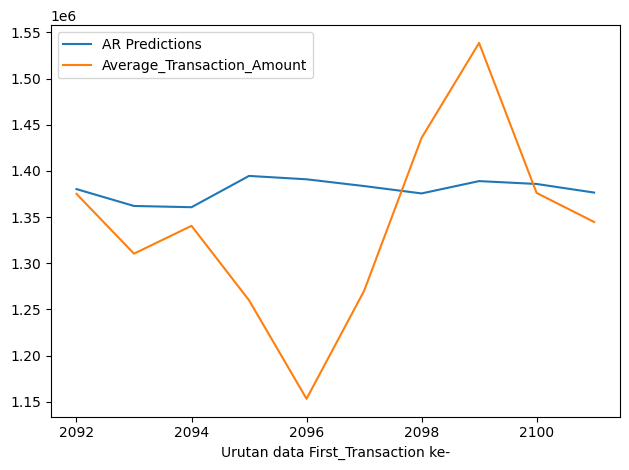

In [10]:
#Membuat prediksi dengan model
pred = ar_model.predict(start=len(train_data), end=(len(train_data)+len(test_data)-1), dynamic=False).rename('AR Predictions')

#Plot
import matplotlib.pyplot as plt
pred.plot(legend=True)
test_data.plot(legend=True)
plt.xlabel('Urutan data First_Transaction ke-')
plt.tight_layout()
plt.show()